In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("TrainingInputFile.csv")

In [3]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


In [4]:
df = df.replace("?", np.nan)

In [14]:
df.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
Class                          0
referral_source_SVHC           0
referral_source_SVHD           0
referral_source_SVI            0
referral_source_other          0
dtype: int64

In [6]:
from pandas_profiling import ProfileReport
ProfileReport(df).to_file("Training_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.drop(columns=['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','TBG'], inplace=True)

In [7]:
df["sex"] = df["sex"].map({"F":0, "M":1})

In [8]:
for column in df.columns:
    if len(df[column].unique())==2:
        df[column] = df[column].map({"f":0, "t":1})

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Class"] = le.fit_transform(df["Class"])

In [10]:
df = pd.get_dummies(df, columns=["referral_source"], drop_first=True)

In [11]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,1.3,2.5,125,1.14,109,1,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,...,4.1,2,102,NaN,NaN,1,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,...,0.98,NaN,109,0.91,120,1,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,...,0.16,1.9,175,NaN,NaN,1,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,...,0.72,1.2,61,0.87,70,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1
3768,68,0.0,0,0,0,0,0,0,0,0,...,1,2.1,124,1.08,114,1,0,0,1,0
3769,74,0.0,0,0,0,0,0,0,0,0,...,5.1,1.8,112,1.07,105,1,0,0,0,1
3770,72,1.0,0,0,0,0,0,0,0,0,...,0.7,2,82,0.94,87,1,0,0,1,0


In [12]:
X = df.drop(columns=["Class"])
y = df["Class"]

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
impute_df = imputer.fit_transform(X)
X = pd.DataFrame(data=np.round(impute_df), columns=X.columns)

In [15]:
X

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,TSH,T3,TT4,T4U,FTI,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,125.0,1.0,109.0,1.0,0.0,0.0,0.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,2.0,102.0,1.0,108.0,0.0,0.0,0.0,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,109.0,1.0,120.0,0.0,0.0,0.0,1.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,175.0,1.0,177.0,0.0,0.0,0.0,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,61.0,1.0,70.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,3.0,131.0,1.0,117.0,0.0,0.0,0.0,1.0
3768,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,124.0,1.0,114.0,0.0,0.0,1.0,0.0
3769,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,2.0,112.0,1.0,105.0,0.0,0.0,0.0,1.0
3770,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,82.0,1.0,87.0,0.0,0.0,1.0,0.0


In [16]:
from imblearn.over_sampling import RandomOverSampler
randsmp = RandomOverSampler()
X, y = randsmp.fit_resample(X, y)

In [22]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

Text(0, 0.5, 'WCSS')

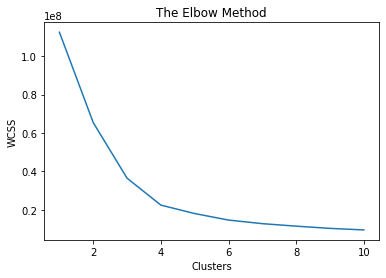

In [19]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")

In [20]:
n_clusters = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing").knee
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
X["Clusters"] = kmeans.fit_predict(X)
X["Labels"] = y

In [23]:
def get_best_param_for_randomForest(X_train, y_train):
    param_grid = {
        "n_estimators": [10, 50, 100, 130],
         "criterion": ['gini', 'entropy'],
        "max_depth": range(2, 4, 1), 
        "max_features": ['auto', 'log2']
    }
    grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, n_jobs=-1, cv=5)
    grid.fit(X_train, y_train)
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    max_features = grid.best_params_['max_features']
    n_estimators = grid.best_params_['n_estimators']
    randomForest = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, max_features=max_features)
    randomForest.fit(X_train, y_train)
    return randomForest

In [24]:
def get_best_param_for_KNN(X_train, y_train):
    param_grid = {
        'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
        'leaf_size' : [10,17,24,28,30,35],
        'n_neighbors':[4,5,8,10,11],
        'p':[1,2]
    }
    grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    algorithm = grid.best_params_['algorithm']
    leaf_size = grid.best_params_['leaf_size']
    n_neighbors = grid.best_params_['n_neighbors']
    p  = grid.best_params_['p']
    knn = KNeighborsClassifier(algorithm=algorithm, leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
    knn.fit(X_train, y_train)
    return knn

In [31]:
def get_best_model(X_train, X_test, y_train, y_test):
    randomForest = get_best_param_for_randomForest(X_train, y_train)
    randomForest_predict = randomForest.predict_proba(X_test)
    if len(y_test.unique())==1:
        randomForest_score = accuracy_score(y_test, randomForest_predict)
    else:
        randomForest_score = roc_auc_score(y_test, randomForest_predict, multi_class='ovr')
    
    knn = get_best_param_for_KNN(X_train, y_train)
    knn_predict = knn.predict_proba(X_test)
    if len(y_test.unique()) == 1:
        knn_score = accuracy_score(y_test, knn_predict)
    else:
        knn_score = roc_auc_score(y_test, knn_predict, multi_class='ovr')
    if randomForest_score > knn_score:
        return randomForest
    else:
        return knn

In [32]:
list_of_clusters = X["Clusters"].unique()
list_of_models = {}
for i in list_of_clusters:
    cluster_data = X[X["Clusters"]==i]
    cluster_feature = cluster_data.drop(columns=["Clusters","Labels"])
    cluster_label = cluster_data["Labels"]
    X_train, X_test, y_train, y_test = train_test_split(cluster_feature, cluster_label, test_size=1/3, random_state=0)
    best_model = get_best_model(X_train, X_test, y_train, y_test)
    print(f"Cluster number {i + 1}: {best_model}")
    list_of_models[i] = best_model

Cluster number 1: RandomForestClassifier(criterion='entropy', max_depth=3)
Cluster number 3: RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=50)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cluster number 2: RandomForestClassifier(max_depth=2, n_estimators=10)
Cluster number 4: KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=4, p=1)


In [44]:
df = pd.read_csv("TestingInputFile.csv")

In [45]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source
0,44,M,f,f,f,f,f,f,f,f,...,1.4,t,39.0,t,1.16,t,33.0,f,?,SVI
1,48,M,f,t,f,f,f,f,f,f,...,1.9,t,87.0,t,1.0,t,87.0,f,?,other
2,61,F,f,f,f,f,f,f,f,f,...,1.5,t,63.0,t,0.56,t,113.0,f,?,SVI
3,35,F,t,f,f,f,f,f,f,f,...,2.0,t,121.0,t,0.81,t,148.0,f,?,other
4,70,F,f,f,f,t,f,f,f,f,...,1.7,t,95.0,t,0.68,t,140.0,f,?,SVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,67,F,f,f,f,f,f,f,f,f,...,1.2,t,65.0,t,0.92,t,71.0,f,?,SVI
255,29,M,t,f,f,f,f,f,f,f,...,2.2,t,142.0,t,0.93,t,153.0,f,?,other
256,49,M,f,f,f,f,f,f,f,f,...,2.1,t,102.0,t,0.93,t,110.0,f,?,SVI
257,43,M,f,f,f,f,f,f,f,f,...,?,t,65.0,t,0.93,t,70.0,f,?,other


In [46]:
df.drop(columns=['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','TBG'], inplace=True)

In [47]:
df = df.replace("?", np.nan)

In [48]:
df.isnull().sum()

age                           0
sex                          13
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
sick                          0
pregnant                      0
thyroid_surgery               0
I131_treatment                0
query_hypothyroid             0
query_hyperthyroid            0
lithium                       0
goitre                        0
tumor                         0
hypopituitary                 0
psych                         0
TSH                          25
T3                           56
TT4                          15
T4U                          23
FTI                          23
referral_source               0
dtype: int64

In [49]:
df["sex"] = df["sex"].map({"F":0, "M":1})
for column in df.columns:
    if df[column].nunique() == 1:
        if df[column].unique()[0]=='f' or df[column].unique()[0]=='F':
            df[column] = df[column].map({df[column].unique()[0] : 0})
        else:
            df[column] = df[column].map({df[column].unique()[0]: 1})
    elif (df[column].nunique()) == 2:
        df[column] = df[column].map({'f': 0, 't': 1})

In [50]:
df = pd.get_dummies(df, columns=["referral_source"], drop_first=True)

In [51]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,TSH,T3,TT4,T4U,FTI,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,44,NaN,0,0,0,0,0,0,0,0,...,0,45.0,1.4,39.0,1.16,33.0,0,0,1,0
1,48,NaN,0,1,0,0,0,0,0,0,...,0,5.4,1.9,87.0,1.0,87.0,0,0,0,1
2,61,NaN,0,0,0,0,0,0,0,0,...,0,0.99,1.5,63.0,0.56,113.0,0,0,1,0
3,35,NaN,1,0,0,0,0,0,0,0,...,0,0.25,2.0,121.0,0.81,148.0,0,0,0,1
4,70,NaN,0,0,0,1,0,0,0,0,...,0,1.1,1.7,95.0,0.68,140.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,67,NaN,0,0,0,0,0,0,0,0,...,0,52.0,1.2,65.0,0.92,71.0,0,0,1,0
255,29,NaN,1,0,0,0,0,0,0,0,...,0,0.33,2.2,142.0,0.93,153.0,0,0,0,1
256,49,NaN,0,0,0,0,0,0,0,0,...,0,0.7,2.1,102.0,0.93,110.0,0,0,1,0
257,43,NaN,0,0,0,0,0,0,0,0,...,0,NaN,NaN,65.0,0.93,70.0,0,0,0,1


In [52]:
impute_df = imputer.transform(df)
df = pd.DataFrame(data=np.round(impute_df), columns=df.columns)

In [53]:
df["Clusters"] = kmeans.predict(df)
clusters = df["Clusters"].unique()

In [55]:
result = []
for i in clusters:
    cluster_data = df[df["Clusters"]==i]
    cluster_data = cluster_data.drop(columns=["Clusters"])
    model = list_of_models[i]
    for val in le.inverse_transform(model.predict(cluster_data)):
        result.append(val)
pd.DataFrame(result, columns=["Predictions"]).to_csv("Predictions.csv", header=True)